In [285]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#get_ipython().run_line_magic('matplotlib', 'inline')
import os
from PIL import Image
import pathlib
import csv
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

import keras
from keras import models
from keras import layers
from keras.layers import Dropout

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')


In [286]:
#CONVERT SONGS FROM .AU TO .WAV FORMAT

#EXTRACT THE SPECTROGRAM IMAGES OF THE SONGS FROM WAV FORMAT

#cmap = plt.get_cmap('inferno')

#plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
#for g in genres:
#    pathlib.Path(f'F:/img_data/{g}').mkdir(parents=True, exist_ok=True)     
#    for filename in os.listdir(f'F:/genres/{g}'):
#        songname = f'F:/genres/{g}/{filename}'
#        y, sr = librosa.load(songname, mono=True, duration=5)
#        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
#        plt.axis('off');
#        plt.savefig(f'F:/img_data/{g}/{filename[:-3].replace(".", "")}.png')
#        plt.clf()

In [287]:
#CREATE A HEADER FOR MAKING A CSV FILE 

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
header

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [288]:
#CREATE A CSV FILE DATA1.CSV in F:/, Then append header as HEADER, then traverse through GENREs.
#CALCULATE CHROMA FREQUENCY, SPECTRAL CENTROID, SPECTRAL BANDWIDTH, SPECTRAL ROLLOFF, ZERO CROSSING RATE, MFCC(0:20),
#FOR 400 SONGS IN WAV FORMAT. APPEND THE VALUES TO DATA1.CSV 

#file = open('F:/data1.csv', 'w', newline='')
#with file:
#    writer = csv.writer(file)
#    writer.writerow(header)
#genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
#for g in genres:
#    for filename in os.listdir(f'F:/genres/{g}'):
#        songname = f'F:/genres/{g}/{filename}'
#        y, sr = librosa.load(songname, mono=True, duration=30)  
#        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)       #chroma frequency
#        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)   #spectral centroid
#        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)    #spectral bandwidth
#        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)      #spectral rolloff
#        zcr = librosa.feature.zero_crossing_rate(y)                 #zero corssing rate
#        mfcc = librosa.feature.mfcc(y=y, sr=sr)                     #mel frequency ceptral coefficients
##        rmse = librosa.feature.rmse(y=y)                          
#        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
#        for e in mfcc:
#            to_append += f' {np.mean(e)}'
#        to_append += f' {g}'
#        file = open('F:/data1.csv', 'a', newline='')
#        with file:
#            writer = csv.writer(file)
#            writer.writerow(to_append.split())

In [289]:
#READ THE DATA
data = pd.read_csv('F:/data1.csv')
data.head(10)

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues
5,blues.00005.wav,0.302346,0.103468,1831.942368,1729.483241,3480.937285,0.094040,-177.869048,118.196916,-17.550673,...,-2.420615,-9.339365,-9.939325,-3.909892,-5.570625,-1.839023,-2.778421,-3.046866,-8.115809,blues
6,blues.00006.wav,0.291308,0.141796,1459.078483,1388.913312,2795.616429,0.073028,-190.149470,130.296951,-36.344138,...,-3.125678,-6.593118,-9.942268,-6.537224,-10.064755,-10.912171,-6.972479,-3.449033,-6.495511,blues
7,blues.00007.wav,0.307921,0.131785,1451.754147,1577.369917,2955.348796,0.061435,-179.395447,136.459244,-26.656359,...,-6.954827,-3.544535,-8.051242,-8.959537,-8.424337,-10.558885,-10.788159,-4.693749,-8.638613,blues
8,blues.00008.wav,0.409037,0.142438,1719.213163,2031.643884,3781.318802,0.064028,-121.361024,122.513116,-14.742130,...,7.010945,-12.741833,5.066005,-5.175478,-1.444025,-7.037070,2.697451,3.409809,-2.698353,blues
9,blues.00009.wav,0.274009,0.081352,1817.516386,1973.739070,3944.451148,0.079215,-213.180803,115.152794,-11.716264,...,3.784770,0.225669,-5.113638,-0.413063,-1.184538,-1.920714,-2.293728,2.891266,-4.233204,blues


In [290]:
data.shape

(1000, 28)

In [291]:
# DROP FILENAME COLUMN FROM THE DATASET AS IT IS NOT NEEDED FOR US RIGHT NOW
data = data.drop(['filename'],axis=1)

In [292]:
#Encoding the Labels
genre_list = data.iloc[:, -1]
genre_list


0      blues
1      blues
2      blues
3      blues
4      blues
5      blues
6      blues
7      blues
8      blues
9      blues
10     blues
11     blues
12     blues
13     blues
14     blues
15     blues
16     blues
17     blues
18     blues
19     blues
20     blues
21     blues
22     blues
23     blues
24     blues
25     blues
26     blues
27     blues
28     blues
29     blues
       ...  
970     rock
971     rock
972     rock
973     rock
974     rock
975     rock
976     rock
977     rock
978     rock
979     rock
980     rock
981     rock
982     rock
983     rock
984     rock
985     rock
986     rock
987     rock
988     rock
989     rock
990     rock
991     rock
992     rock
993     rock
994     rock
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

In [293]:
#genre_list
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [294]:
#Scaling the Feature columns using StanddradScaler
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X.shape

(1000, 26)

In [295]:
#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [296]:
#Building our Neural network model

model = models.Sequential()
#model.add(Dropout(0.2, input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
#model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [297]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_test, y_test)
                    )

Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 [==============================] - 2s 3ms/step - loss: 2.2631 - acc: 0.1371 - val_loss: 2.0934 - val_acc: 0.2900
Epoch 2/20
700/700 [==============================] - 0s 74us/step - loss: 2.0563 - acc: 0.2700 - val_loss: 1.9062 - val_acc: 0.3233
Epoch 3/20
700/700 [==============================] - 0s 73us/step - loss: 1.8621 - acc: 0.3443 - val_loss: 1.7534 - val_acc: 0.3333
Epoch 4/20
700/700 [==============================] - 0s 76us/step - loss: 1.7538 - acc: 0.3571 - val_loss: 1.6333 - val_acc: 0.3867
Epoch 5/20
700/700 [==============================] - 0s 80us/step - loss: 1.6403 - acc: 0.3843 - val_loss: 1.5251 - val_acc: 0.4667
Epoch 6/20
700/700 [==============================] - 0s 73us/step - loss: 1.5684 - acc: 0.4214 - val_loss: 1.4424 - val_acc: 0.4967
Epoch 7/20
700/700 [==============================] - 0s 69us/step - loss: 1.4862 - acc: 0.4757 - val_loss: 1.3803 - val_acc: 0.5333
Epoch 8/20
700/700 [====

In [298]:
#Find the test set accuracy

test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)


300/300 [==============================] - 0s 87us/step
test_acc:  0.6866666666666666


In [299]:
score = model.evaluate(X_test, y_test, verbose=0)
print("val_loss = {:.3f} and val_acc = {:.5f}".format(score[0], score[1]))

val_loss = 1.016 and val_acc = 0.68667


In [300]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis =1)
y_pred.shape


(300,)

In [301]:
for item_a, item_b in zip(y_test, y_pred):
    print(item_a, item_b)

2 9
6 6
6 6
4 4
6 5
4 4
5 5
2 2
7 7
8 8
3 3
7 7
0 0
3 2
7 7
2 2
4 4
5 5
0 0
1 1
3 3
0 0
4 4
0 9
7 7
5 5
7 7
5 5
4 4
9 2
5 5
9 9
0 0
9 5
9 4
1 1
7 7
2 2
0 0
0 2
8 8
9 7
7 7
3 0
4 3
1 1
5 5
6 6
9 9
6 3
1 1
9 0
2 2
3 7
0 0
9 3
5 4
9 3
9 3
5 5
5 1
4 4
1 1
5 5
3 3
7 7
0 0
3 3
1 1
0 0
1 1
6 6
2 2
0 5
8 8
0 0
7 7
0 0
3 3
9 6
8 8
5 5
9 6
2 7
7 7
3 3
8 8
2 2
9 0
3 8
7 7
8 8
3 3
9 9
2 2
2 2
3 1
9 8
1 1
9 8
5 1
4 4
8 8
7 7
7 7
4 8
2 7
2 7
9 0
2 2
4 8
7 7
8 8
7 7
6 6
6 6
3 3
3 3
7 7
2 2
4 6
0 6
1 1
9 0
9 0
1 1
9 7
5 5
4 4
0 0
9 0
4 4
8 8
7 7
8 4
9 9
8 8
4 7
2 7
0 0
0 0
0 0
5 5
3 3
7 7
7 7
0 0
6 6
9 9
9 9
4 4
7 7
9 3
8 7
3 3
6 6
4 2
5 5
3 7
2 0
9 9
1 1
7 7
7 9
1 1
6 6
1 1
4 4
2 9
9 9
6 6
0 6
3 3
3 3
1 1
7 7
6 6
9 7
9 5
5 5
4 3
4 4
7 1
9 7
1 1
4 7
0 0
1 1
5 5
6 6
0 0
2 2
5 3
9 2
3 2
1 1
9 5
7 7
2 0
9 5
5 5
8 2
2 1
9 5
5 5
1 1
5 5
1 1
6 6
1 1
8 4
1 1
5 5
5 1
7 7
3 7
7 7
8 8
5 5
7 7
3 8
3 3
9 9
6 6
7 7
2 5
3 8
0 0
5 5
4 4
0 0
2 2
1 1
4 8
3 3
2 0
7 7
9 8
1 1
5 5
8 4
6 6
6 6
8 8
7 7
1 1
9 3
6 6
5 2
4 4


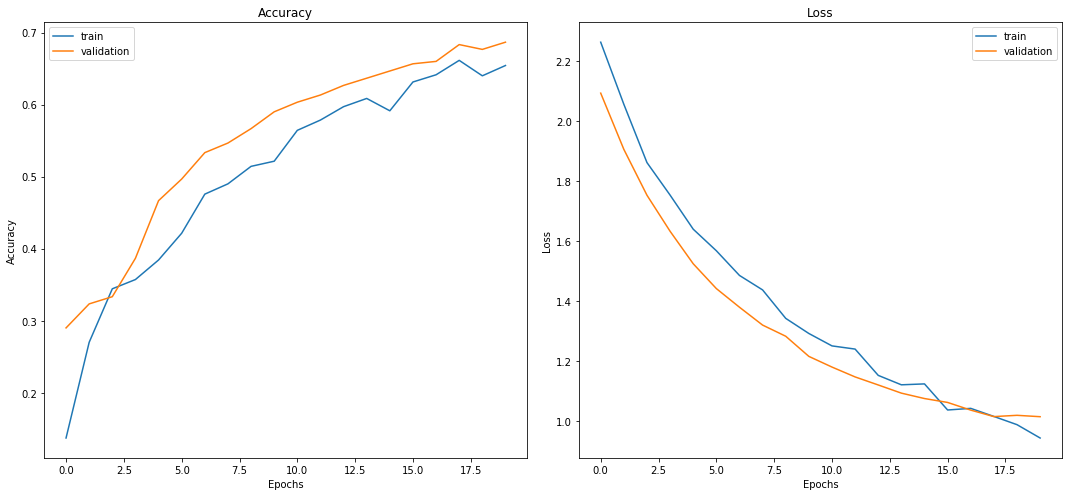

In [302]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [374]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [375]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

ValueError: multilabel-indicator is not supported

Confusion matrix, without normalization
Normalized confusion matrix


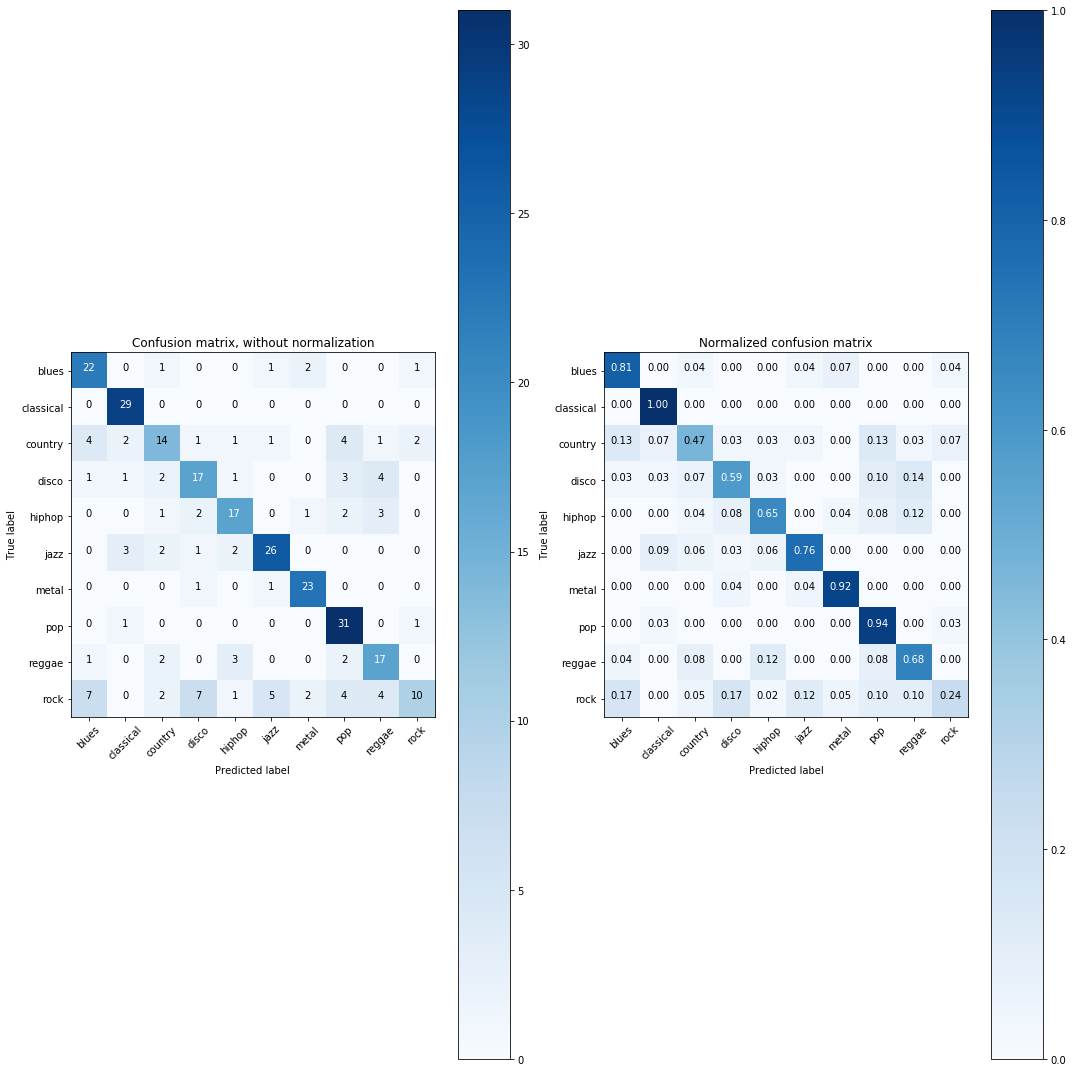

In [377]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plot_confusion_matrix(cnf_matrix, classes=genres,
                      title='Confusion matrix, without normalization')

plt.subplot(1,2,2)
plot_confusion_matrix(cnf_matrix, classes=genres, normalize=True,
                      title='Normalized confusion matrix')


plt.tight_layout()
plt.show()

In [307]:
TP = np.diag(cnf_matrix)

FP = []
for i in range(10):
    FP.append(sum(cnf_matrix[:,i]) - cnf_matrix[i,i])

FN = []
for i in range(10):
    FN.append(sum(cnf_matrix[i,:]) - cnf_matrix[i,i])

TN = []
for i in range(10):
    temp = np.delete(cnf_matrix, i, 0)   # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))
    
l = len(y_test)
for i in range(10):
    print((TP[i] + FP[i] + FN[i] + TN[i]) == l)

True
True
True
True
True
True
True
True
True
True


In [308]:
values = np.array([TP, FP, FN, TN])
print('\tTP', '  FP', '  FN', '  TN')
values.T

	TP   FP   FN   TN


array([[ 22,  13,   5, 260],
       [ 29,   7,   0, 264],
       [ 14,  10,  16, 260],
       [ 17,  12,  12, 259],
       [ 17,   8,   9, 266],
       [ 26,   8,   8, 258],
       [ 23,   5,   2, 270],
       [ 31,  15,   2, 252],
       [ 17,  12,   8, 263],
       [ 10,   4,  32, 254]], dtype=int64)

In [309]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.63      0.81      0.71        27
          1       0.81      1.00      0.89        29
          2       0.58      0.47      0.52        30
          3       0.59      0.59      0.59        29
          4       0.68      0.65      0.67        26
          5       0.76      0.76      0.76        34
          6       0.82      0.92      0.87        25
          7       0.67      0.94      0.78        33
          8       0.59      0.68      0.63        25
          9       0.71      0.24      0.36        42

avg / total       0.69      0.69      0.66       300



In [363]:
sensitivity = TP/(TP + FN)
specificity = np.array(TN)/(np.array(TN) + np.array(FP))
print('sensitivity','specificity')
for x,y in zip(sensitivity,specificity):
    print(x.round(2),'\t\t',y.round(2))

print('\navg / total')
print(np.mean(sensitivity).round(2),'\t\t', np.mean(specificity).round(2))    


sensitivity specificity
0.81 		 0.95
1.0 		 0.97
0.47 		 0.96
0.59 		 0.96
0.65 		 0.97
0.76 		 0.97
0.92 		 0.98
0.94 		 0.94
0.68 		 0.96
0.24 		 0.98

avg / total
0.71 		 0.97


In [333]:
# from sklearn.metrics import roc_curve, auc

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_test = lb.transform(y_test)
y_pred = lb.transform(y_pred)
print(roc_auc_score(y_test, y_pred, average="macro"))



0.8358094352314207
